<a href="https://colab.research.google.com/github/deletella01/Hamoye-Quiz-Tag-Along-code/blob/main/Stage_E_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [3]:
file_path = '/content/drive/MyDrive/Hamoye/Stage data/household_power_consumption.txt'

In [4]:
import pandas as pd

data = pd.read_csv(file_path, sep=';')  # Adjust the separator as needed
data.head()

<ipython-input-4-65987d9b9a84>:3: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, sep=';')  # Adjust the separator as needed


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
data.shape

(2075259, 9)

In [6]:
df = data.copy()
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.drop(['Date', 'Time'],axis=1, inplace=True)
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00


In [7]:
df.isnull().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
Datetime                     0
dtype: int64

In [8]:
df[df=='?'].count()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3               0
Datetime                     0
dtype: int64

In [9]:
columns = df.columns
columns = columns.drop('Datetime')
columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [10]:
df[columns] = df[columns].apply(pd.to_numeric, errors='coerce')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   Datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [12]:
df_ff = df[columns].fillna(method='ffill')
df_ff['Datetime'] = df['Datetime']
df_ff.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
dtype: int64

In [13]:
df_ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   Datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [14]:
df2 = df_ff[['Datetime','Global_active_power']]

In [15]:
df2.set_index('Datetime', inplace=True)
df_hourly = df2.resample('H').sum()

**Question 11**: Firstly, forward-fill all the missing values.Resample the data from a minute sampling rate to an hourly sampling rate (i.e sum over the minutes for each hour). Which of the following is a plot of the hourly global_active_power over time?

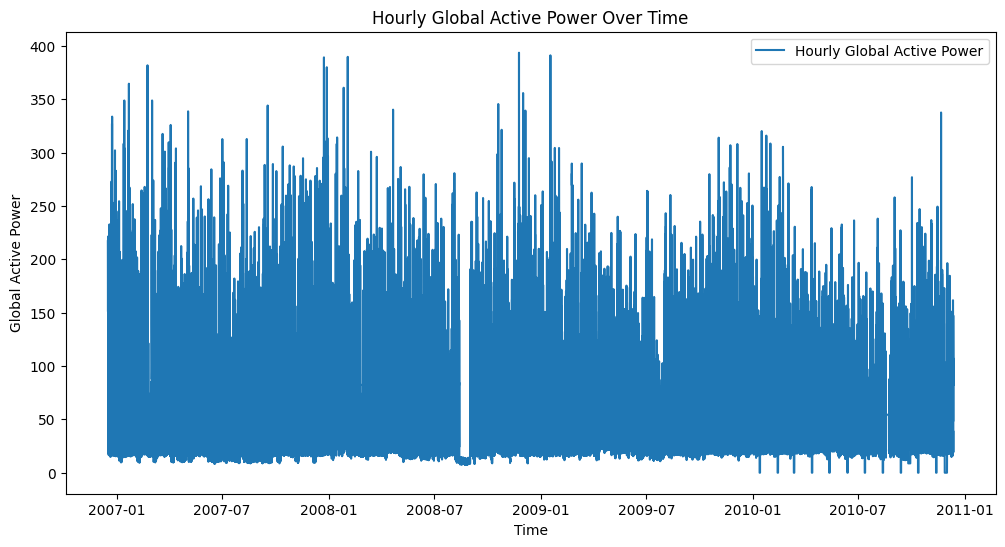

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df_hourly.index, df_hourly['Global_active_power'], label='Hourly Global Active Power')
plt.title('Hourly Global Active Power Over Time')
plt.xlabel('Time')
plt.ylabel('Global Active Power')
plt.legend()
plt.show()

**Question 12**: What is the Pearson correlation coefficient between the global_active_power and voltage? To 3 decimal places

In [17]:
# Calculate Pearson correlation coefficient
correlation_coefficient = df_ff['Global_active_power'].corr(df_ff['Voltage'])

# Print the result to 3 decimal places
print(f"Pearson correlation coefficient: {correlation_coefficient:.3f}")

Pearson correlation coefficient: -0.396


**Question 13**: what is the Pearson correlation coefficient between the Voltage and global_intensity? To 2 decimal places.

In [18]:
correlation_coef2 = df_ff['Voltage'].corr(df_ff['Global_intensity'])

print(f"Pearson correlation coefficient: {correlation_coef2:.2f}")

Pearson correlation coefficient: -0.41


**Preprocessing**: Using the daily sampling rate (sum), divide the data into a train and test set. The last 300 days is your test set and the first (x-300) days is your training set. Where x is the length of the dataset. Use Facebook Prophet to train a Univariate time series modeling using this time column (‘dt’ or ‘ds’) and the global_active_power (or ‘y’).

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 1 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Global_active_power  float64
dtypes: float64(1)
memory usage: 31.7 MB


In [20]:
df3 = df_ff.copy()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   Datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [21]:
df_daily = df2.resample('D').sum()
df_daily.head()

,Global_active_power
Datetime,
2006-12-16,1209.176
2006-12-17,3390.460
2006-12-18,2203.826
2006-12-19,1666.194
2006-12-20,2225.748


In [22]:
x = len(df_daily)
train = df_daily.iloc[:-300]
test = df_daily.iloc[-300:]
print(x)
print(train.shape)
print(test.shape)

1457
(1157, 1)
(300, 1)


In [23]:
train_prophet = train.reset_index().rename(columns={'Datetime': 'ds', 'Global_active_power': 'y'})

In [24]:
train_prophet.head()

,ds,y
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [25]:
# Train the model using Facebook Prophet
model = Prophet()
model.fit(train_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpijsjc7gz/__6zgwbw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpijsjc7gz/gkl9f450.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33953', 'data', 'file=/tmp/tmpijsjc7gz/__6zgwbw.json', 'init=/tmp/tmpijsjc7gz/gkl9f450.json', 'output', 'file=/tmp/tmpijsjc7gz/prophet_model6x18bfwv/prophet_model-20231201214542.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:45:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:45:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [26]:
# Make predictions for the test set
future = pd.DataFrame(data={'ds': test.index})
forecast = model.predict(future)
# Extract predictions for the test set
test_predictions = forecast['yhat']

**Question 14**: Evaluating the results of your time series modeling on the test set. What is the MAPE (in %) in 2 decimal places?

In [27]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_error(test['Global_active_power'], test_predictions) / test['Global_active_power'].mean() * 100

# Print the MAPE to 2 decimal places
print(f"MAPE: {mape:.2f}%")

MAPE: 29.53%


**Question 15**: What is the RMSE in 2 decimal places?

In [28]:
from sklearn.metrics import mean_squared_error

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(test['Global_active_power'], test_predictions))

# Print the RMSE to 2 decimal places
print(f"RMSE: {rmse:.2f}")

RMSE: 576.49


**Question 16**: If you plot the components from the forecasted model, what day of the weekly seasonality has the lowest value?

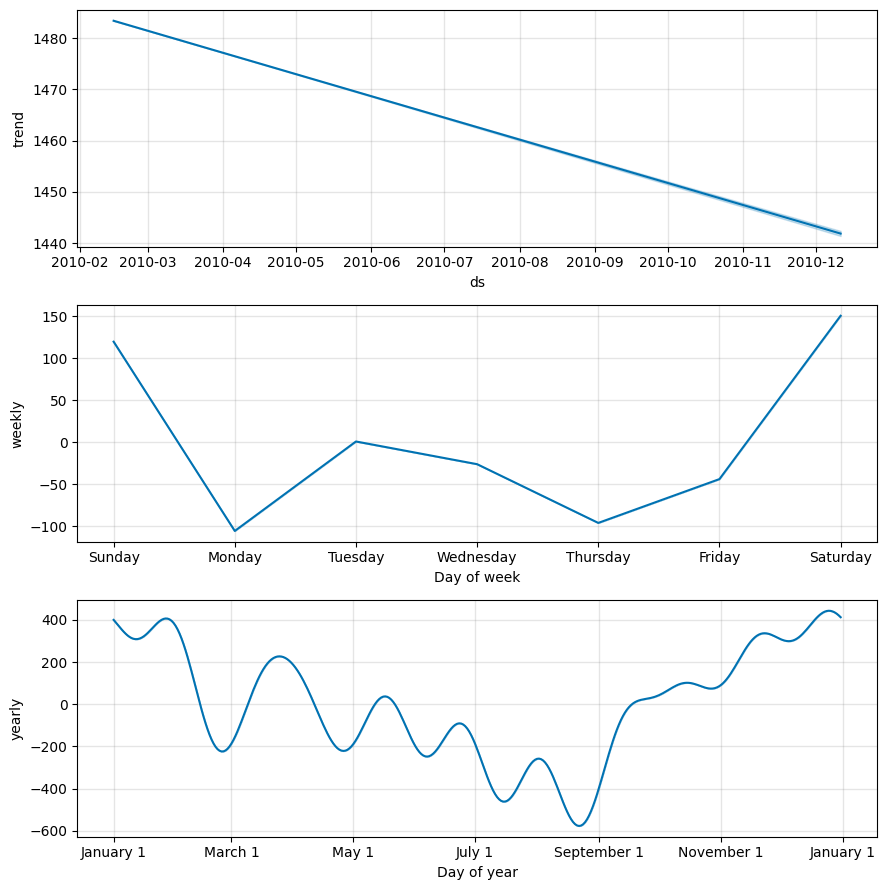

In [29]:
fig = model.plot_components(forecast)
plt.show()

From the chart above, the day of weekly seasonality with the lowest value is **Monday**

**Preprocessing**: In the last exercise, we used only the dependent variable (Global_Active_Power) and the time component for our modeling (ds vs y). Next, we will build a time series model using the other variables. These variables will be added to the forecast model as a regressor on Facebook Prophet. So the six independent variables ['Global_reactive_power', 'Voltage','Global_intensity', 'Sub_metering_1','Sub_metering_2','Sub_metering_3'] will be [‘add1’, ‘add2’, ‘add3’, ‘add4’, ‘add5’, ‘add6’] as the regressors. Split the data into train and test as done above and build a multivariate forecast model to forecast the last 300 days of the house consumption (‘global_active_power’).

In [30]:
df3.set_index('Datetime', inplace=True)

In [31]:
df_daily2 = df3.resample('D').sum()
df_daily2.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [36]:
df03 = df_daily2.reset_index().rename(columns={'Datetime': 'ds',
                                               'Global_active_power': 'y',
                                               'Global_reactive_power':'add1',
                                               'Voltage':'add2','Global_intensity':'add3',
                                               'Sub_metering_1':'add4',
                                               'Sub_metering_2':'add5',
                                               'Sub_metering_3':'add6'})
df03.head()

,ds,y,add1,add2,add3,add4,add5,add6
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [38]:
x2 = len(df03)
train2 = df03.iloc[:-300]
test2 = df03.iloc[-300:]
print(x2)
print(train2.shape)
print(test2.shape)

1457
(1157, 8)
(300, 8)


In [39]:
train_prophet2 = train2.copy()

In [40]:
train_prophet2.head()

,ds,y,add1,add2,add3,add4,add5,add6
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [ ]:
df03.head()

,ds,y,add1,add2,add3,add4,add5,add6
0,2006-12-16,1209.176,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-17,3390.460,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-18,2203.826,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-19,1666.194,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-20,2225.748,0.528,235.68,15.8,0.0,1.0,17.0


In [41]:
x2 = len(df03)
train2 = df03.iloc[:-300]
test2 = df03.iloc[-300:]
print(x2)
print(train2.shape)
print(test2.shape)

1457
(1157, 8)
(300, 8)


In [42]:
# Train the model using Facebook Prophet
model2 = Prophet()
model2.add_regressor('add1')
model2.add_regressor('add2')
model2.add_regressor('add3')
model2.add_regressor('add4')
model2.add_regressor('add5')
model2.add_regressor('add6')
model2.fit(train_prophet2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpijsjc7gz/6zyccj47.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpijsjc7gz/l8i2iefs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18097', 'data', 'file=/tmp/tmpijsjc7gz/6zyccj47.json', 'init=/tmp/tmpijsjc7gz/l8i2iefs.json', 'output', 'file=/tmp/tmpijsjc7gz/prophet_modelt3danbgj/prophet_model-20231201221005.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:10:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:10:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [43]:
# Step 6: Make predictions for the test set
future2 = pd.DataFrame(data={'ds': test2['ds']})
future2['add1'] = test2['add1'] # Populate with the future values of 'Global_reactive_power'
future2['add2'] = test2['add2']  # Populate with the future values of 'Voltage'
future2['add3'] = test2['add3']  # Populate with the future values of 'Global_intensity'
future2['add4'] = test2['add4']  # Populate with the future values of 'Sub_metering_1'
future2['add5'] = test2['add5'] # Populate with the future values of 'Sub_metering_2'
future2['add6'] = test2['add6']  # Populate with the future values of 'Sub_metering_3'

forecast2 = model2.predict(future2)

In [44]:
# Extract predictions for the test set
test_predictions2 = forecast2['yhat']

**Question 17**: Evaluating the results of your time series modeling on the test set, what is the MAPE (in %) in 2 decimal places?

In [47]:
from sklearn.metrics import mean_absolute_error
# Calculate Mean Absolute Percentage Error (MAPE)
mape2 = mean_absolute_error(test2['y'], test_predictions2) / test2['y'].mean() * 100

# Print the MAPE to 2 decimal places
print(f"MAPE of multivariate: {mape2:.2f}%")

MAPE of multivariate: 1.02%


**Question 18**: What is the RMSE in 2 decimal places?

In [48]:
from sklearn.metrics import mean_squared_error

# Calculate Root Mean Squared Error (RMSE)
rmse2 = np.sqrt(mean_squared_error(test2['y'], test_predictions2))

# Print the RMSE to 2 decimal places
print(f"RMSE: {rmse2:.2f}")

RMSE: 18.50


**Question 19**: If you plot the components from the multivariate forecasted model, what day of the daily seasonality has the lowest value?

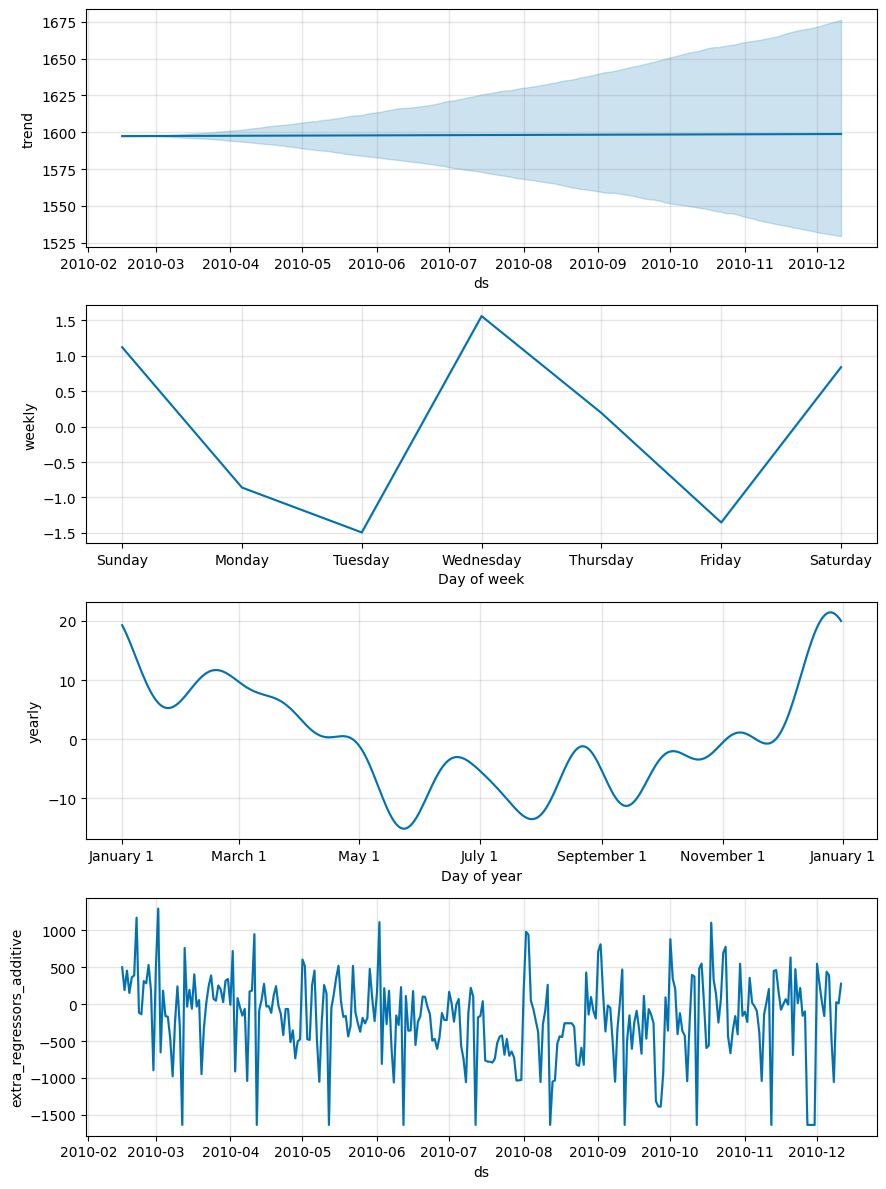

In [49]:
fig2 = model2.plot_components(forecast2)
plt.show()

From the component plot above, of the multivariate forecasted model, the day of the daily seasonality with the lowest value is **Tuesday**

**Question 20**: If you plot the components from the forecasted model, what month of the yearly seasonality has the lowest value?

From the component plot above, of the multivariate forecasted model, the month of the yearly seasonality with the lowest value is **May**